In [1]:
import json
from itertools import chain
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geojson
from urllib.parse import urlparse
from datetime import datetime
from IPython.display import Image, HTML, display
import ipywidgets as widgets
import requests

from satnogs_api_client import fetch_observation_data_from_id, \
                               fetch_ground_station_data


SSTV_observations_dump = 'SSTV_2018July/observations.json'
SSTV_ground_stations_dump = 'SSTV_2018July/ground_stations.json'
start = datetime(2018, 7, 30, 16, 55)
end = datetime(2018, 7, 31, 18, 51)

In [2]:
# Fetch all observations during the event
observations = fetch_observation_data_from_id(norad_id=25544, start=start, end=end, prod=True)
ground_station_ids = set(map(lambda o: o['ground_station'], observations))
ground_stations = fetch_ground_station_data(ground_station_ids, prod=True)

# Store fetched observation data in a local file
with open(SSTV_observations_dump, 'w') as outfile:
    json.dump(observations, outfile)

# Store fetched ground station data in a local file
with open(SSTV_ground_stations_dump, 'w') as outfile:
    json.dump(ground_stations, outfile)

In [3]:
# Load observation data from file (replaces the cell above)

with open(SSTV_observations_dump, 'r') as f:
    observations = json.load(f)

with open(SSTV_ground_stations_dump, 'r') as f:
    ground_stations = json.load(f)

ground_station_ids = set(map(lambda o: o['ground_station'], observations))

In [4]:
# Get overview of the fetched observations
observations_failed = list(filter(lambda o: o['vetted_status'] == 'failed', observations))
observations_bad = list(filter(lambda o: o['vetted_status'] == 'bad', observations))
observations_unkown = list(filter(lambda o: o['vetted_status'] == 'unknown', observations))
observations_good = list(filter(lambda o: o['vetted_status'] == 'good', observations))

print("GOOD/UNKOWN/BAD/FAILED = {}/{}/{}/{}".format(len(observations_good),
                                                    len(observations_unkown),
                                                    len(observations_bad),
                                                    len(observations_failed)))

GOOD/UNKOWN/BAD/FAILED = 59/0/40/10


In [5]:
# Print statistics

ground_station_ids_good = set(map(lambda o: o['ground_station'], observations_good))
ground_stations_good = list(filter(lambda gs: gs['id'] in ground_station_ids_good, ground_stations))

print("ID   #Obs  #Images")
for id in sorted(ground_station_ids_good):
    obs = list(filter(lambda o: o['ground_station'] == id, observations_good))
    demod_data = list(chain.from_iterable(map(lambda o: o['demoddata'], obs)))
    
    print("{:4d}  {:2d}   {:2d}".format(id, len(obs), len(demod_data)))

ID   #Obs  #Images
  13   4    7
  15   1    3
  33   1    2
  36   1    1
  37   2    3
  39   2    4
  46   2    6
  47   4   12
  49   3    6
  56   2    5
  58   1    2
  65   2    4
  87   4    3
  91   2    3
  96   2    4
 101   4    9
 102   3    3
 110   5   10
 141   4   10
 147   4   19
 150   3    6
 162   3    3


In [6]:
# Load observation metadata inta a pandas DataFrame for better analysis

# observations_sorted = sorted(observations, key=lambda obs: obs['ground_station'])
# observations_by_ground_stations = groupby(observations_sorted, key=lambda obs: obs['ground_station'])
observations_df = pd.DataFrame.from_records(data=observations_good, index='id')
observations_df['start'] = pd.to_datetime(observations_df['start'])
observations_df['end'] = pd.to_datetime(observations_df['end'])

observations_df

archive_url  archived  \
id                                                                    
199654  https://archive.org/download/satnogs-observati...      True   
199496  https://archive.org/download/satnogs-observati...      True   
199400  https://archive.org/download/satnogs-observati...      True   
199646  https://archive.org/download/satnogs-observati...      True   
199645  https://archive.org/download/satnogs-observati...      True   
199639  https://archive.org/download/satnogs-observati...      True   
199666  https://archive.org/download/satnogs-observati...      True   
199643  https://archive.org/download/satnogs-observati...      True   
199648  https://archive.org/download/satnogs-observati...      True   
199406  https://archive.org/download/satnogs-observati...      True   
199649  https://archive.org/download/satnogs-observati...      True   
199647  https://archive.org/download/satnogs-observati...      True   
199640  https://archive.org/download/satnogs-observati...      True   
199745  https://archive.org/download/satnogs-observati...      True   
199644  https://archive.org/download/satnogs-observati...      True   
199638  https://archive.org/download/satnogs-observati...      True   
199653  https://archive.org/download/satnogs-observati...      True   
199495  https://archive.org/download/satnogs-observati...      True   
199399  https://archive.org/download/satnogs-observati...      True   
199779  https://archive.org/download/satnogs-observati...      True   
199665  https://archive.org/download/satnogs-observati...      True   
199732  https://archive.org/download/satnogs-observati...      True   
199405  https://archive.org/download/satnogs-observati...      True   
199409  https://archive.org/download/satnogs-observati...      True   
199385  https://archive.org/download/satnogs-observati...      True   
199664  https://archive.org/download/satnogs-observati...      True   
199350  https://archive.org/download/satnogs-observati...      True   
199494  https://archive.org/download/satnogs-observati...      True   
199389  https://archive.org/download/satnogs-observati...      True   
197848  https://archive.org/download/satnogs-observati...      True   
199343  https://archive.org/download/satnogs-observati...      True   
199277  https://archive.org/download/satnogs-observati...      True   
199345  https://archive.org/download/satnogs-observati...      True   
199346  https://archive.org/download/satnogs-observati...      True   
197493  https://archive.org/download/satnogs-observati...      True   
197496  https://archive.org/download/satnogs-observati...      True   
197836  https://archive.org/download/satnogs-observati...      True   
197841  https://archive.org/download/satnogs-observati...      True   
197511  https://archive.org/download/satnogs-observati...      True   
197514  https://archive.org/download/satnogs-observati...      True   
199313  https://archive.org/download/satnogs-observati...      True   
197498  https://archive.org/download/satnogs-observati...      True   
197520  https://archive.org/download/satnogs-observati...      True   
197509  https://archive.org/download/satnogs-observati...      True   
197448  https://archive.org/download/satnogs-observati...      True   
197497  https://archive.org/download/satnogs-observati...      True   
197501  https://archive.org/download/satnogs-observati...      True   
199272  https://archive.org/download/satnogs-observati...      True   
197507  https://archive.org/download/satnogs-observati...      True   
197503  https://archive.org/download/satnogs-observati...      True   
197516  https://archive.org/download/satnogs-observati...      True   
197492  https://archive.org/download/satnogs-observati...      True   
197512  https://archive.org/download/satnogs-observati...      True   
197495  https://archive.org/download/satnogs-observati...      True   
197840  https://archive.org/download/satnogs-observati...      True   

In [7]:
# Show all images for all ground stations
# (based on: https://stackoverflow.com/a/27795087)

IMG_HTML_TEMPLATE = "<img style='width: 200px; margin: 10px; float: left; border: 1px solid black;' src='%s' />"

for ground_station_id, obs in observations_df.groupby('ground_station'):
    no_images = sum(map(lambda observation_id: len(observations_df.loc[observation_id]['demoddata']), obs.index))
    print('{}, {}: {} observations, {} images'.format(ground_station_id,
                                                      list(filter(lambda gs: gs['id']==ground_station_id, ground_stations))[0]['name'],
                                                      len(obs),
                                                      no_images))

    for observation_id in obs.index:
        imagesList = ''.join( [IMG_HTML_TEMPLATE % demoddata['payload_demod'] 
                               for demoddata in observations_df.loc[observation_id]['demoddata'] ])

        display(HTML(imagesList))

13, OZ9AEC-VHF1: 4 observations, 7 images


15, VK5QI-2M: 1 observations, 3 images


33, G7KSE: 1 observations, 2 images


36, oe8rke: 1 observations, 1 images


37, DL4PD: 2 observations, 3 images


39, CGBSAT-VHF: 2 observations, 4 images


46, DE8MSH: 2 observations, 6 images


47, DB0RV: 4 observations, 12 images


49, OZ7SAT: 3 observations, 6 images


56, ZL4VBJ: 2 observations, 5 images


58, SR1GEO_RACK01: 1 observations, 2 images


65, QG62: 2 observations, 4 images


87, M0IEB: 4 observations, 3 images


91, M0EYT: 2 observations, 3 images


96, sam210723 VHF: 2 observations, 4 images


101, Marcs: 4 observations, 9 images


102, PA3RVG VHF: 3 observations, 3 images


110, ok1phu-1: 5 observations, 10 images


141, balcony: 4 observations, 10 images


147, F6KKR: 4 observations, 19 images


150, OM1LD: 3 observations, 6 images


162, ZL1WJQ: 3 observations, 3 images


In [8]:
def timestamp_from_filename(filename):
    url = urlparse(filename)
    t_str = url.path.split('/')[-1].split('_')[-1].split('.')[0][:19]
    try:
        return datetime.strptime(t_str, '%Y-%m-%dT%H-%M-%S')
    except ValueError:
        pass
    
data_events = []
for observation in observations_good:
    for demod_data in observation['demoddata']:
        try:
            t = timestamp_from_filename(demod_data['payload_demod'])

            data_events.append({'date': t,
                                'observation_id': observation['id'],
                                'ground_station': observation['ground_station'],
                                'payload_demod': demod_data['payload_demod']})
        except ValueError:
            pass
            # print("Couldn't parse '{}'.".format(payload_demod.path))

<IPython.core.display.Javascript object>


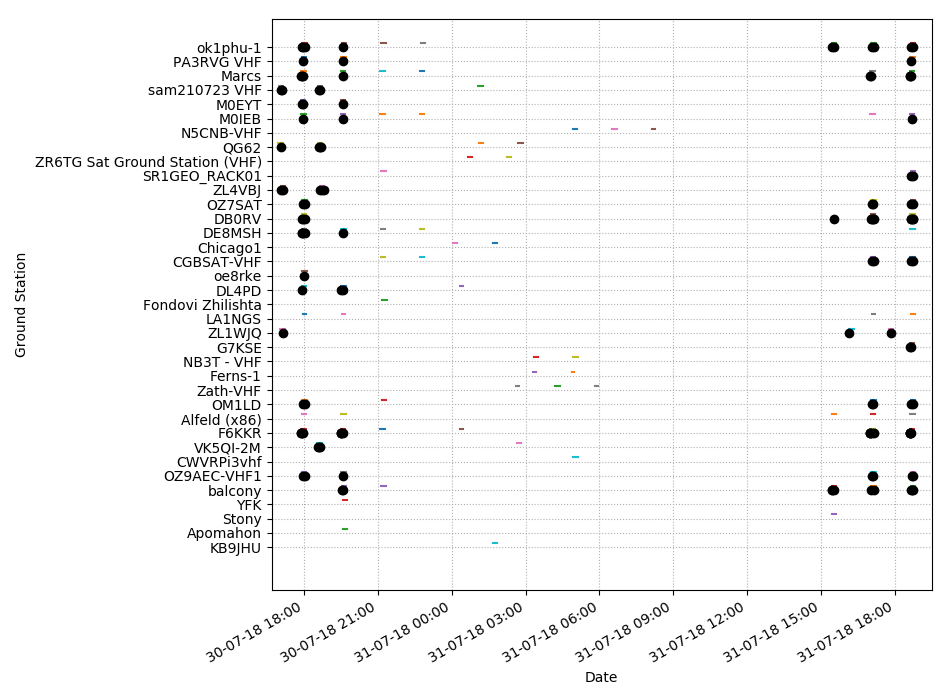

([datetime.datetime(2018, 7, 30, 16, 56, 19), datetime.datetime(2018, 7, 30, 17, 6, 55)], [29.3, 29.3])


In [9]:
# Plot all demodulated payloads grouped by the ground_station
# based on: https://stackoverflow.com/a/25042264

%matplotlib notebook
plt.rcParams["figure.figsize"] = [9.5, 7]

def parse_start_end_time(observation):
    start = datetime.strptime(observation['start'], '%Y-%m-%dT%H:%M:%SZ')
    end = datetime.strptime(observation['end'], '%Y-%m-%dT%H:%M:%SZ')
    return start, end


# Create pandas.DataFrame for easier handling
df = pd.DataFrame.from_records(data_events, index='date')

# Map ground_stations to y-values
cat_dict = dict(zip(ground_station_ids, range(1, len(ground_station_ids)+1)))

# map y-values to categories
val_dict = dict(zip(range(1, len(ground_station_ids)+1), list(map(lambda gs: gs['name'], ground_stations))))

# Add y-values to the data
df['plot_y'] = df['ground_station'].apply(cat_dict.get)

fig, ax = plt.subplots()


for observation in observations:
    yy = ([*parse_start_end_time(observation)],
          [cat_dict[observation['ground_station']]+0.3, cat_dict[observation['ground_station']]+0.3])
    ax.plot(*yy)
print(yy)
df['plot_y'].plot(ax=ax, style='ko')


# Set xaxis label format
xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
ax.xaxis.set_major_formatter(xfmt)

# format y-ticks look up the categories
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: val_dict.get(x)))
ax.set_yticks(range(1, len(ground_station_ids)+1))
ax.set_ylim([-2,len(ground_station_ids)+2])

ax.set_xlabel('Date')
ax.set_ylabel('Ground Station')

ax.grid(linestyle='dotted')

plt.tight_layout()
# The first event phase
# ax.set_xlim([datetime(2018, 7, 30, 16, 50), datetime(2018, 7, 30, 19, 50)])
ax.set_xlim([datetime(2018, 7, 30, 16, 40), datetime(2018, 7, 31, 19, 30)])

fig.show()

In [10]:
# Create ground station GeoJSON feature collection
import geojson

gs_features = []
for ground_station in ground_stations_good:
    ob_feature = geojson.Feature(geometry=geojson.Point((ground_station['lng'],
                                                         ground_station['lat'])),
                                 properties=ground_station)
    gs_features.append(ob_feature)
# gs_collection = geojson.FeatureCollection(features)

In [11]:
# Find the first start time and the last end time
from datetime import datetime, date


start_time_str = sorted(observations_good, key=lambda obs: obs['start'])[0]['start']
end_time_str = sorted(observations_good, key=lambda obs: obs['end'])[-1]['end']

start_time = datetime.strptime(start_time_str, '%Y-%m-%dT%H:%M:%SZ')
end_time = datetime.strptime(end_time_str, '%Y-%m-%dT%H:%M:%SZ')
print(start_time, end_time)

2018-07-30 16:56:19 2018-07-31 18:50:39


In [12]:
# Get satellite meta data

norad_cat_id = observations[0]['norad_cat_id']
DB_BASE_URL = 'https://db.satnogs.org/api'

r = requests.get(url='{}/satellites/{}/'.format(DB_BASE_URL, norad_cat_id))
if r.status_code != requests.codes.ok:
    print("ERROR: Satellite {} not found in network.".format(norad_cat_id))
satellite_meta = r.json()
satellite_meta['start'] = start_time_str
satellite_meta['end'] = end_time_str

In [13]:
# Calculate non-overlapping, continuous observation windows
data = []
for i, row in observations_df.iterrows():
    data.append((row.start, row.end))

# Source: https://stackoverflow.com/a/34797890
def merge_date_ranges(data):
    data = sorted(data, key=lambda d: d[0])
    
    result = []
    t_old = data[0]
    for t in data[1:]:
        if t_old[1] >= t[0]:  #I assume that the data is sorted already
            t_old = ((min(t_old[0], t[0]), max(t_old[1], t[1])))
        else:
            result.append(t_old)
            t_old = t
    else:
        result.append(t_old)
    return result

observation_timespans = merge_date_ranges(data)

for ts in observation_timespans:
    print(ts)

(Timestamp('2018-07-30 16:56:19'), Timestamp('2018-07-30 17:12:24'))
(Timestamp('2018-07-30 17:52:06'), Timestamp('2018-07-30 18:05:51'))
(Timestamp('2018-07-30 18:31:33'), Timestamp('2018-07-30 18:49:09'))
(Timestamp('2018-07-30 19:28:18'), Timestamp('2018-07-30 19:42:37'))
(Timestamp('2018-07-31 15:26:50'), Timestamp('2018-07-31 15:37:17'))
(Timestamp('2018-07-31 16:09:23'), Timestamp('2018-07-31 16:20:25'))
(Timestamp('2018-07-31 17:00:33'), Timestamp('2018-07-31 17:13:54'))
(Timestamp('2018-07-31 17:46:22'), Timestamp('2018-07-31 17:56:48'))
(Timestamp('2018-07-31 18:36:34'), Timestamp('2018-07-31 18:50:39'))


In [14]:
# Calculate satellite ground track using pyephem
# (Fetching the TLE wasn't possible, use hardcoded TLE instead)
import ephem
from datetime import datetime
import pandas as pd

# Return 'num' evenly spaced datetimes in the range from 'start' to 'stop'
def lin_datetime_range(start, end, num=50):
    time_step = (end - start)/num
    for n in range(num):
        yield start + n * time_step

line1 = "ISS (ZARYA)"

# Source: https://network.satnogs.org/observations/199654/
line2 = '1 25544U 98067A   18211.88252492  .00000585  00000-0  16284-4 0  9996'
line3 = '2 25544  51.6413 160.9262 0005295   8.5470  91.2564 15.53780903125313'

satellite = ephem.readtle(line1, line2, line3)
sat_features = []
for observation_window in observation_timespans:
    sat_positions = []
    for t in pd.date_range(start=observation_window[0], end=observation_window[1], freq='20s'):
        satellite.compute(t)
        if(len(sat_positions)>1 and satellite.sublong/ephem.degree<sat_positions[-1][0]):
            # Cut LineString when crossing the antimeridian to prevent antimeridian artifacts
            sat_linestring = geojson.LineString(sat_positions)
            sat_features.append(geojson.Feature(geometry=sat_linestring, properties=satellite_meta))
            sat_positions = []
        sat_positions.append((satellite.sublong/ephem.degree,
                             satellite.sublat/ephem.degree))
    sat_linestring = geojson.LineString(sat_positions)
    sat_features.append(geojson.Feature(geometry=sat_linestring, properties=satellite_meta))

In [15]:
# Combine ground station and satellite features
collection = geojson.FeatureCollection([*gs_features, *sat_features])

In [16]:
GEOJSON_OUTPUT = 'SSTV_2018July/ground_stations.geojson'

# Write GeoJSON collection in a file

data = geojson.dumps(collection, sort_keys=True)

In [17]:
# Load geojson from file (replaces the previous cell)
with open(GEOJSON_OUTPUT, 'w') as out_file:
    json.dump(collection, out_file)

In [18]:
# Display the GeoJSON file
import folium


# Create a map
m = folium.Map(location=[0,10],
               zoom_start=2)

# listening stations
# sat ground track
folium.GeoJson(
    data,
    name='geojson'
).add_to(m)
m